**Box-Cox Transformation**

Variance measures data variation around the mean, affecting data distribution shapes such as bell curves or power laws. The Box-Cox transformation helps convert non-normal distribution to normal for simpler analysis. This method adjusts data variability, aiming for a bell-shaped curve.

Data distribution can form a bell curve or follow a power law.
https://media.geeksforgeeks.org/wp-content/uploads/20200531214708/powerlaw..png

we have a way to transform power-law or any non-linear distribution to normal using a Box-Cox Transformation
trying to move the peak towards the centre then we can get a curve close to the bell-shaped curve.
Logarithmic transformation is all we need. When a log transformation is applied to non-normal distribution, it tries to expand the differences between the smaller values because the slope for the logarithmic function is steeper for smaller values whereas the differences between the larger values can be reduced because, for large values, log distribution has a moderate slope. 

Box-cox Transformation only cares about computing the value of \lambda  which varies from – 5 to 5. A value of \lambda  is said to be best if it is able to approximate the non-normal curve to a normal curve. The transformation equation is as follows:y(\lambda)=(y^{\lambda}-1) / \lambda if  \lambda != 0 
               &    log y if  \lambda=0 
This function requires input to be positive.

SciPy’s stats package provides a function called boxcox for performing box-cox power transformation that takes in original non-normal data as input and returns fitted data along with the lambda value that was used to fit the non-normal distribution to normal distribution.


In [1]:
# import modules
import numpy as np
from scipy import stats
 
# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt
 

In [3]:
# generate non-normal data (exponential)
original_data = np.random.exponential(size = 1000)
original_data[:5]

array([1.27995822, 0.2334343 , 0.22006899, 0.15634942, 1.88933875])

C:\Users\kasin\AppData\Local\Temp\ipykernel_6888\2482818457.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(original_data, hist = False, kde = True,
C:\Users\kasin\AppData\Local\Temp\ipykernel_6888\2482818457.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(fitted_data,

Lambda value used for Transformation: 0.23858044805430034


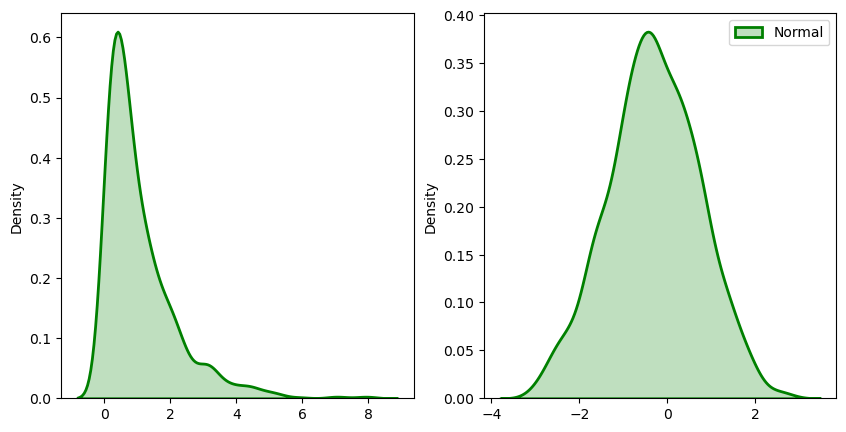

In [20]:
# transform training data & save lambda value
fitted_data, fitted_lambda = stats.boxcox(original_data)
 
# creating axes to draw plots
fig, ax = plt.subplots(1, 2)
 
# plotting the original data(non-normal) and 
# fitted data (normal)
sns.distplot(original_data, hist = False, kde = True,
            kde_kws = {'fill': True, 'linewidth': 2}, 
            label = "Non-Normal", color ="green", ax = ax[0])
 
sns.distplot(fitted_data, hist = False, kde = True,
            kde_kws = {'fill': True, 'linewidth': 2}, 
            label = "Normal", color ="green", ax = ax[1])
 
# adding legends to the subplots
plt.legend(loc = "upper right")
 
# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(10)
 
print(f"Lambda value used for Transformation: {fitted_lambda}")

Box-cox does not guarantee normality because it never checks for the normality which is necessary to be foolproof that it has correctly transformed the non-normal distribution or not. It only checks for the smallest Standard deviation. 

Therefore, it is absolutely necessary to always check the transformed data for normality using a probability plot